# __Machine Learning Models (Linear Regression) Interpretability and Explainer__

***
## __Model Interpretability__

`Interpretability is the extent to which humans, including non-subject-matter experts, can understand the cause and effect, and input and output, of a machine learning model`<br>
`To say a model has a high level of interpretability means you can describe ibrn a human-interpretable way its inference`<br>
`In other words, why does an input to a model produce a specific output?`<br>
`Understanding how a model performs under different circumstances can help us explain why it makes certain predictions, and when it cannot`<br>


***
__Python Libraries__
- Yellowbrick | `pip install yellowbrick` | https://www.scikit-yb.org/en/latest/
- LIME | `pip install lime` | https://github.com/marcotcr/lime
- SHAP | `pip install shap` | https://github.com/slundberg/shap


- ELI5 | `pip install eli5` | https://eli5.readthedocs.io/en/latest/
- Skater | https://github.com/oracle/Skater#install-skater
***

## Let's get started with Coding!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

C:\Users\kimat\AppData\Local\Temp\ipykernel_19900\1097722367.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## __Load California Housing Dataset__

In [2]:
data = fetch_california_housing()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [3]:
california_housing = pd.DataFrame(data.data, columns=data.feature_names)
california_housing.sample(7)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
5680    4.2500      40.0  4.691748   1.152913       902.0  2.189320     33.71   
16060   4.3977      49.0  5.804714   0.993266       795.0  2.676768     37.76   
18279   7.7068      35.0  7.126984   1.095238       548.0  2.899471     37.35   
18047   4.5156      19.0  5.354467   1.034582       790.0  2.276657     37.25   
18854   3.4519      15.0  6.157303   1.130337      1188.0  2.669663     41.28   
14942   3.1771      17.0  6.380658   1.125514      1410.0  2.901235     32.74   
10724  11.1121      15.0  7.778846   1.084135      1289.0  3.098558     33.63   

       Longitude  
5680     -118.29  
16060    -122.49  
18279    -122.08  
18047    -121.96  
18854    -122.45  
14942    -116.99  
10724    -117.80

In [4]:
california_housing['Price'] = data.target
california_housing.tail(3)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  Price  
20637    -121.22  0.923  
20638    -121.32  0.847  
20639    -121.24  0.894

In [5]:
features = list(data.feature_names)
print(features)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


***
## __Model Interpretability__

## __Yellowbrick__

### __Prediction Error Plot and Residuals Plot__

In [6]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

In [7]:
X_train, X_test, y_train, y_test = train_test_split(california_housing[features], california_housing['Price'], test_size=0.2, random_state=0)

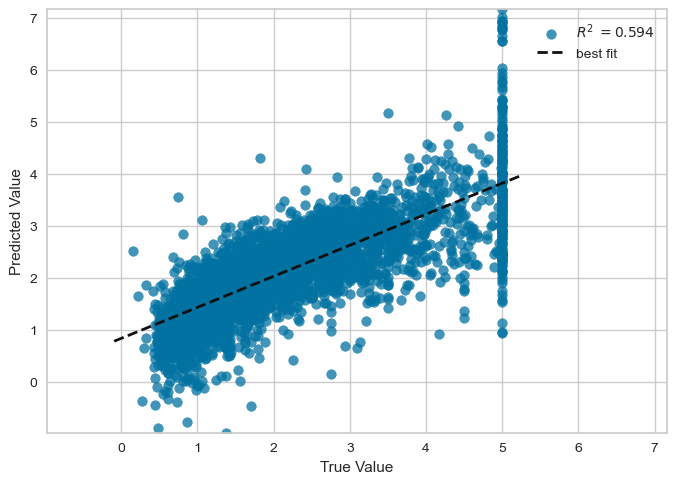

In [8]:
model = LinearRegression()

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()

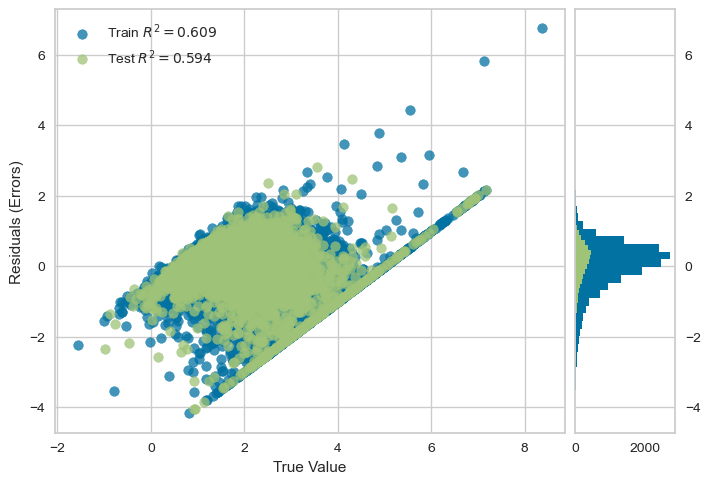

In [9]:
model = LinearRegression()

visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plt.xlabel('True Value')
plt.ylabel('Residuals (Errors)')
plt.legend()
plt.show()

In [10]:
def yellowbrick_analyzer(df, cols):
    train_test_split(california_housing[features], california_housing['Price'], test_size=0.2, random_state=0)

***
## __LIME__

**Local Interpretable Model-Agnostic Explanations (LIME)** — It should be locally interpretable and able to explain any models.

- LIME doesn’t make any assumptions about the model whose prediction is explained.
- It treats the model as a black-box, so the only way that it has to understand its behavior is perturbing the input and see how the predictions change.
- LIME produces an explanation by approximating the black-box model by an interpretable model

In [11]:
import lime
import lime.lime_tabular

In [12]:
features

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(california_housing[features].to_numpy(), 
                                                    california_housing['Price'].to_numpy(),
                                                    test_size=0.2, random_state=0)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [15]:
mean_squared_error(y_test, y_pred)

0.5289841670367244

In [16]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=features,
                                                  class_names=['Price'],
                                                  verbose=True,
                                                  mode='regression')


In [17]:
i=0
exp = explainer.explain_instance(X_test[i], model.predict, num_features=5)


Intercept 2.2105669335969815
Prediction_local [1.86545756]
Right: 2.2811073825514754


In [18]:
exp.show_in_notebook(show_table=True)

In [19]:
model.predict(X_test[i].reshape(1, -1))

array([2.28110738])

In [20]:
X_test[i]

array([ 4.15180000e+00,  2.20000000e+01,  5.66307278e+00,  1.07547170e+00,
        1.55100000e+03,  4.18059299e+00,  3.25800000e+01, -1.17050000e+02])

In [21]:
print(features)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [22]:
i=1
exp = explainer.explain_instance(X_test[i], model.predict, num_features=5)

exp.show_in_notebook(show_table=True)

Intercept 1.9265431909167412
Prediction_local [2.94650699]
Right: 2.7900912823530533


In [23]:
xt = pd.DataFrame(X_train, columns=features)
xt.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16512.000000  16512.000000  16512.000000  16512.000000  16512.000000   
mean       3.876298     28.619065      5.432607      1.096174   1425.437742   
std        1.906783     12.600999      2.523415      0.489529   1143.062756   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.566625     18.000000      4.447644      1.005760    785.000000   
50%        3.548500     29.000000      5.234243      1.048720   1166.000000   
75%        4.747575     37.000000      6.059008      1.100000   1724.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  16512.000000  16512.000000  16512.000000  
mean       3.030518     35.624783   -119.563008  
std        6.441340      2.136552      2.005251  
min        0.750000     32.540000   -124.350000  
25%        2.428016     33.930000   -121.800000  
50%        2.817937     34.250000   -118.490000  
75%        3.283243     37.710000   -118.000000  
max      599.714286     41.950000   -114.310000

***
## SHAP

__SHAP (SHapley Additive exPlanations)__ is a game theoretic approach to explain the output of any machine learning model.

- Feature importance: Variables are ranked in descending order.
- Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
- Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.
- Correlation: A high level of the “RM” content has a high and positive impact on the House Price. The “high” comes from the red color, and the “positive” impact is shown on the X-axis. Similarly, we will say “CRIM” is negatively correlated with the target variable.

In [24]:
import shap
shap.initjs()

In [25]:
shap.initjs()

In [26]:
cols = features

In [27]:
X_train, X_test, y_train, y_test = train_test_split(california_housing[cols], california_housing['Price'],
                test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [28]:
background_data_sample = shap.sample(X_test, 100)

In [29]:
# Create the explainer with the smaller background dataset
explainer = shap.KernelExplainer(model.predict, background_data_sample)

# Calculate Shapley values
shap_values = explainer.shap_values(X_test, nsamples=101)

  0%|          | 0/4128 [00:00<?, ?it/s]

In [30]:
shap_values.shape

(4128, 8)

In [31]:
X_test.shape

(4128, 8)

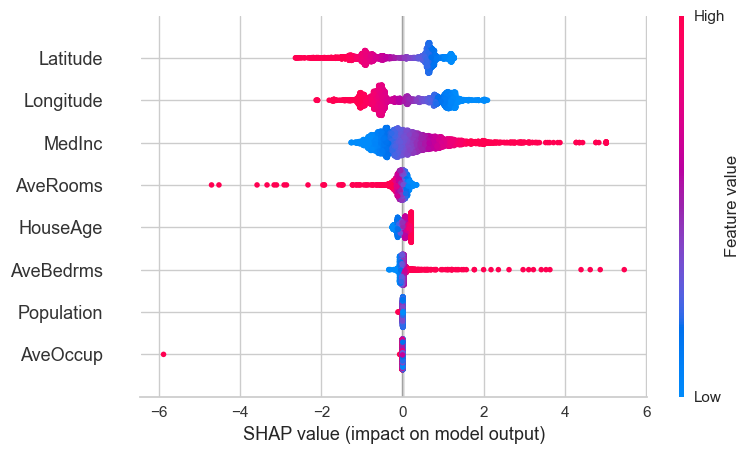

In [32]:
shap.summary_plot(shap_values, X_test)

***
## __The Dependence Plot__

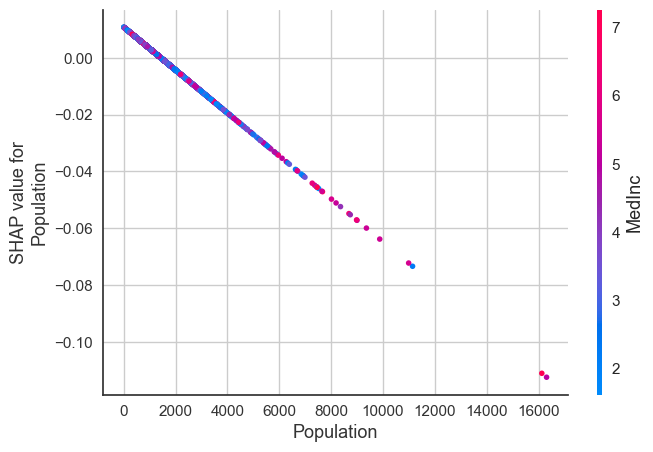

In [33]:
shap.dependence_plot('Population', shap_values, X_test)

***
### __The Individual Force Plot__

You can produce a very elegant plot for each observation called the force plot. I arbitrarily chose the `1st` observation of the X_test data. Below are the average values of X_test, and the values of the `1st` observation.

In [34]:
i=11
X_test.iloc[i]

MedInc          2.601200
HouseAge       21.000000
AveRooms        6.039855
AveBedrms       1.097826
Population    861.000000
AveOccup        3.119565
Latitude       36.980000
Longitude    -120.210000
Name: 9228, dtype: float64

In [35]:
shap_values[i]

array([-0.36111233, -0.075647  , -0.10271489,  0.01585706,  0.00433722,
       -0.0010382 , -0.59112484,  0.31442305])

In [36]:
explainer.expected_value

1.90084128157231

In [37]:
model.predict(X_test).mean()

2.0631856576257865

In [38]:
shap.force_plot(explainer.expected_value, shap_values[i], X_test.iloc[i])

***
### __SHAP Heatmap__

In [40]:
X = california_housing[features]
y = california_housing['Price']
model = LinearRegression().fit(X,y)

In [41]:
# explainer = shap.Explainer(model, X)
# shap_values = explainer(X)

In [42]:
# shap.plots.heatmap(shap_values,max_display=13)

***
### __Explain Machine Learning Model with SHAP Waterfall__

Waterfall plots are designed to display explanations for individual predictions, so they expect a single row of an Explanation object as input.

The bottom of a waterfall plot starts as the expected value of the model output, and then each row shows how the positive (red) or negative (blue) contribution of each feature moves the value from the expected model output over the background dataset to the model output for this prediction.

In [51]:
# i=0
# shap.plots.waterfall(shap_values[i], max_display=13)

In [52]:
y.mean()

2.068558169089147

In [53]:
model.predict(X)[0]

4.131649827076764

In [54]:
shap.plots.bar(shap_values, max_display=13)

TypeError: The shap_values argument must be an Explanation object, Cohorts object, or dictionary of Explanation objects!

***
## __Feature Selection with SHAP__

In [44]:
print(features)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [45]:
least_features = ['MedInc', 'HouseAge', 'AveRooms']
imp_features = ['AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names


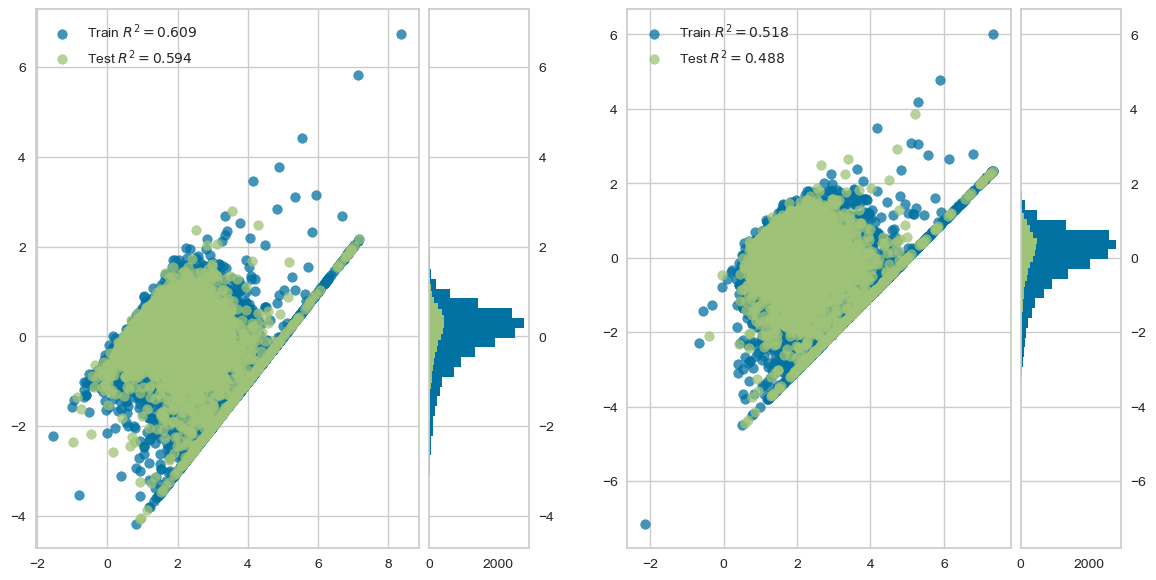

In [49]:
def run_Linear_Regression(df):
    fig,ax = plt.subplots(ncols=2, figsize=(14,7))
    
    #reference plot
    X_train, X_test, y_train, y_test = train_test_split(california_housing[features], california_housing['Price'],
                test_size=0.2,
                random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[0])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()
  

    #Residuals Plot with Selected Features
    #reference plot
    X_train, X_test, y_train, y_test = train_test_split(df, california_housing['Price'],
                test_size=0.2,
                random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()
  


run_Linear_Regression(california_housing[least_features])